In [102]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:\me\自學課程\機器學習百日馬拉松\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:\me\自學課程\機器學習百日馬拉松\data\application_test.csv
D:\me\自學課程\機器學習百日馬拉松\data\application_train.csv
D:\me\自學課程\機器學習百日馬拉松\data\data-science-london-scikit-learn.zip
D:\me\自學課程\機器學習百日馬拉松\data\HomeCredit_columns_description.csv
D:\me\自學課程\機器學習百日馬拉松\data\house_test.csv.gz
D:\me\自學課程\機器學習百日馬拉松\data\house_train.csv.gz
D:\me\自學課程\機器學習百日馬拉松\data\taxi_data1.csv
D:\me\自學課程\機器學習百日馬拉松\data\titanic_test.csv
D:\me\自學課程\機器學習百日馬拉松\data\titanic_train.csv
D:\me\自學課程\機器學習百日馬拉松\data\data-science-london-scikit-learn\test.csv
D:\me\自學課程\機器學習百日馬拉松\data\data-science-london-scikit-learn\train.csv
D:\me\自學課程\機器學習百日馬拉松\data\data-science-london-scikit-learn\trainLabels.csv


In [103]:
## import libraries

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Evaluation
from sklearn.metrics import accuracy_score

## Interface: https://blog.konghy.cn/2017/12/16/python-warnings/
import warnings
warnings.filterwarnings('ignore')

In [104]:
## import datasets
train = pd.read_csv('D:\me\自學課程\機器學習百日馬拉松\data\data-science-london-scikit-learn/train.csv', header=None)
test = pd.read_csv('D:\me\自學課程\機器學習百日馬拉松\data\data-science-london-scikit-learn/test.csv', header=None)
train_label = pd.read_csv('D:\me\自學課程\機器學習百日馬拉松\data\data-science-london-scikit-learn/trainLabels.csv', header=None)

In [105]:
print(train.shape)
print(test.shape)
print(train_label.shape)
train.head()

(1000, 40)
(9000, 40)
(1000, 1)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [106]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [107]:
## 統計資訊
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

In [109]:
## np.ravel: https://blog.csdn.net/tymatlab/article/details/79009618
X, y = train, np.ravel(train_label)
y

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,

In [110]:
## 拆成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [111]:
X_train.shape

(750, 40)

In [112]:
X_test.shape

(250, 40)

In [113]:
y_train.shape

(750,)

In [114]:
y_test.shape

(250,)

## KNN

In [115]:
algorithm = ['auto', 'ball_tree', 'brute']
weights = ['uniform', 'distance']
neig = range(1, 40)
train_accuracy = []
test_accuracy = []
best_score = 0.0
best_knn = None

In [116]:
X_train = X_train.to_numpy() 
X_test = X_test.to_numpy()

Train Score:  0.9466666666666667
Test Score:  0.912
KNeighborsClassifier(n_neighbors=3)


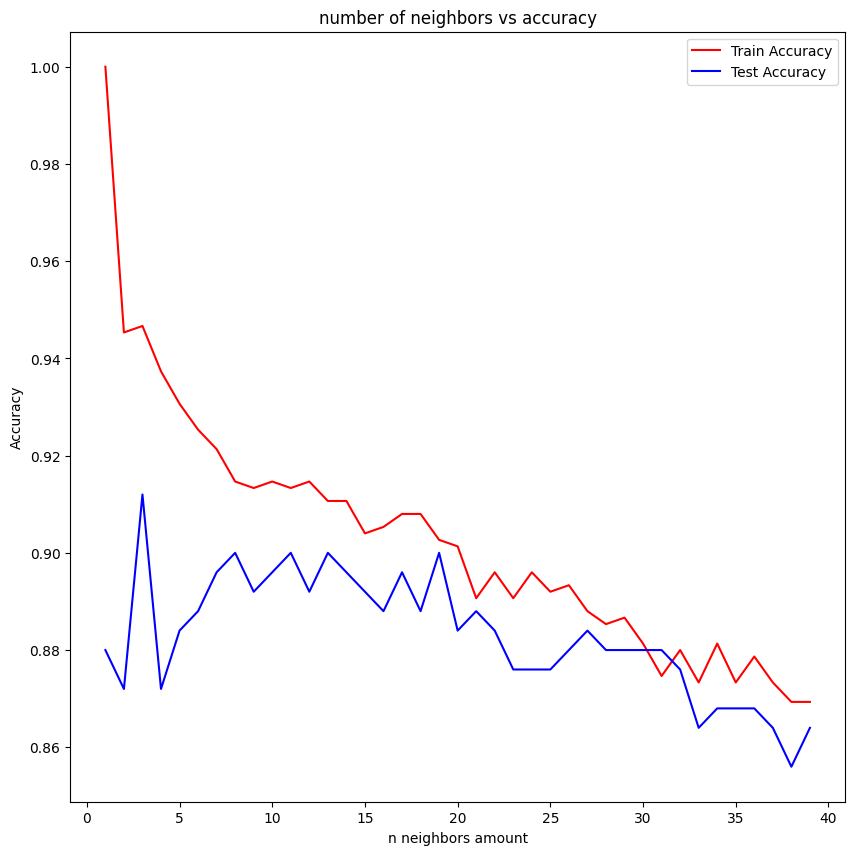

In [117]:
for k in neig:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'auto', weights = 'uniform')
    KNN.fit(X_train, y_train)
    
    y_pred = KNN.predict(X_test)
    train_score = KNN.score(X_train, y_train)
    test_score = accuracy_score(y_test, y_pred)
    
    train_accuracy.append(train_score)
    test_accuracy.append(test_score)
    
    ## 找出最佳的準確度
    if test_score > best_score:
        best_score = test_score
        best_knn = KNN
    
## 視覺化: 了解設定什麼k值有最佳的準確度
plt.figure(figsize = (10, 10))
plt.plot(neig, train_accuracy, c = 'red', label = 'Train Accuracy')
plt.plot(neig, test_accuracy, c = 'blue', label = 'Test Accuracy')
plt.title('number of neighbors vs accuracy')
plt.xlabel('n neighbors amount')
plt.ylabel('Accuracy')
plt.legend()

print('Train Score: ', best_knn.score(X_train, y_train))
print('Test Score: ', best_score)
print(best_knn)    

## Random Forest

In [118]:
clf = RandomForestClassifier(random_state = 10)
n_estimators = [20, 30, 60, 90, 120, 140]
max_depth = [1, 7, 10, 20, 40]
split = [5, 10, 17, 20]

param = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = split)

grid_search = GridSearchCV(estimator = clf, param_grid = param, cv = 5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(X_train, y_train)

y_pred = grid_result.predict(X_test)
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Accuracy: 0.872000 using {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 140}


In [119]:
print('Train Score: ', grid_result.score(X_train, y_train))
print('Test Score: ', accuracy_score(y_pred, y_test))

Train Score:  0.9946666666666667
Test Score:  0.868


## SVC Model

In [120]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
SVCModel = SVC(kernel = 'rbf', max_iter = 1000, C = 0.1)
SVCModel.fit(X_train, y_train)
y_pred = SVCModel.predict(X_test)
print('Train Score: ', SVCModel.score(X_train, y_train))
print('Test Score: ', accuracy_score(y_pred, y_test))

Train Score:  0.86
Test Score:  0.836


In [121]:
y_pred.shape

(250,)

## Gaussian Mixture Model
https://ithelp.ithome.com.tw/articles/10195700
https://ithelp.ithome.com.tw/articles/10206244

In [123]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

pca = PCA(0.95, whiten=True)
train_pc = pca.fit_transform(train)
test_pc = pca.transform(test)
print(train_pc.shape)
print(test_pc.shape)

(1000, 29)
(9000, 29)


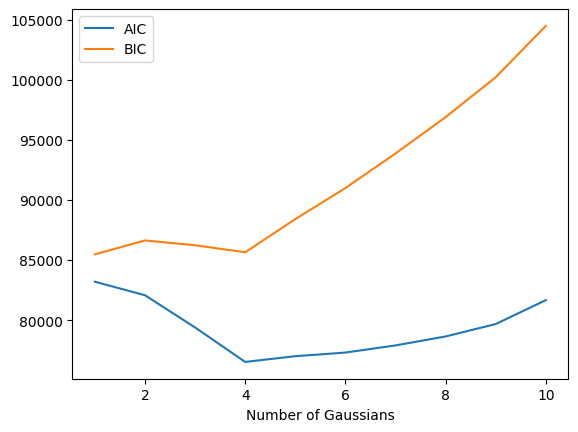

In [124]:
# Let's fit GMM with various number of components
n_components = np.arange(1,11)
models = [GaussianMixture(n, covariance_type='full', random_state=100) 
          for n in n_components]
aics = [model.fit(train_pc).aic(train_pc) for model in models]
bics = [model.fit(train_pc).bic(train_pc) for model in models]

plt.plot(n_components, aics, label='AIC')
plt.plot(n_components, bics, label='BIC')
plt.xlabel('Number of Gaussians')
plt.legend()
plt.show()

In [125]:
best_gmm = GaussianMixture(n_components=4, covariance_type='full').fit(train_pc)

# Let's apply the model to get probabilities
train_gmm = best_gmm.predict_proba(train_pc)
test_gmm = best_gmm.predict_proba(test_pc)
print(train_gmm.shape)
print(test_gmm.shape)

# Split the new data into train and validadtion set
X_train_gmm, X_val_gmm, y_train_gmm, y_val_gmm = train_test_split(train_gmm, train_label, random_state=42, test_size=0.2)

(1000, 4)
(9000, 4)


In [141]:
'''
print('X shape: ', X.shape)
print('\n')

lowest_bic = np.infty
bic = []

cv_types = ['tied', 'full', 'diag', 'spherical']

for ct in cv_types:
    for n_components in range(1, 8):
        gmm = GaussianMixture(n_components = n_components,covariance_type = ct)
        gmm.fit(X)
        bic.append(gmm.aic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
best_gmm.fit(X)
gmm_train = best_gmm.predict_proba(X_train)
gmm_val = best_gmm.predict_proba(X_test)
gmm_test = best_gmm.predict_proba(test)
print(gmm.aic(X))
'''

X shape:  (1000, 40)


149659.50613926936


In [142]:
'''
print("gmm test: ", gmm_val.shape)
print("gmm_train: ", gmm_train.shape)
print("X train: ", X_train.shape)
print('X test: ', X_test.shape)
'''

gmm test:  (250, 5)
gmm_train:  (750, 5)
X train:  (750, 40)
X test:  (250, 40)


## 將Gaussian Mixture Model重新將數據集聚類的結果，再應用回KNN、RandomForest、SVC

In [137]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
SVCModel = SVC(kernel = 'rbf', max_iter = 1000, C = 0.1)
SVCModel.fit(X_train_gmm, y_train_gmm)
y_pred = SVCModel.predict(test_gmm)
print('Train Score: ', SVCModel.score(X_train_gmm, y_train_gmm))
print('Test Score: ', SVCModel.score(X_val_gmm, y_val_gmm))


Train Score:  0.995
Test Score:  0.985


In [139]:
SVCModel = SVC(kernel = 'rbf', max_iter = 1000, C = 0.1)
SVCModel.fit(train_gmm, train_label)
y_pred = SVCModel.predict(test_gmm)
submission = {'Id': np.arange(1, y_pred.shape[0]+1), 'Solution': y_pred}
submission = pd.DataFrame(submission)
submission.to_csv('svc_submission.csv', index=False)

## KNN

Train Score:  1.0
Test Score:  0.985
KNeighborsClassifier(n_neighbors=1)


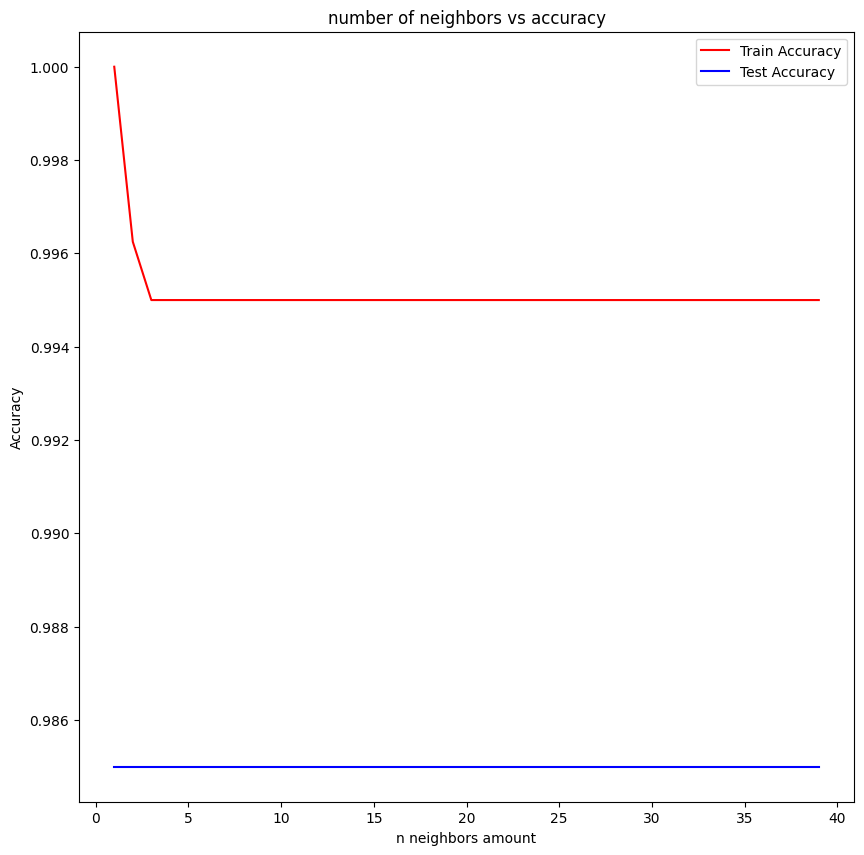

In [145]:
algorithm = ['auto', 'ball_tree', 'brute']
weights = ['uniform', 'distance']
neig = range(1, 40)
train_accuracy = []
test_accuracy = []
best_score = 0.0
best_knn = None

for k in neig:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'auto', weights = 'uniform')
    KNN.fit(X_train_gmm, y_train_gmm)
    y_pred = KNN.predict(test_gmm)
    train_score = KNN.score(X_train_gmm, y_train_gmm)
    test_score = KNN.score(X_val_gmm, y_val_gmm)
    
    train_accuracy.append(train_score)
    test_accuracy.append(test_score)
    
    ## 找出最佳的準確度
    if test_score > best_score:
        best_score = test_score
        best_knn = KNN
    
## 視覺化: 了解設定什麼k值有最佳的準確度
plt.figure(figsize = (10, 10))
plt.plot(neig, train_accuracy, c = 'red', label = 'Train Accuracy')
plt.plot(neig, test_accuracy, c = 'blue', label = 'Test Accuracy')
plt.title('number of neighbors vs accuracy')
plt.xlabel('n neighbors amount')
plt.ylabel('Accuracy')
plt.legend()

print('Train Score: ', best_knn.score(X_train_gmm, y_train_gmm))
print('Test Score: ', best_score)
print(best_knn)   

In [146]:
best_knn.fit(train_gmm, train_label)
ypred = best_knn.predict(test_gmm)
submission = {'Id': np.arange(1, ypred.shape[0]+1),
             'Solution': ypred}
submission = pd.DataFrame(submission)
submission.to_csv('knn_submission.csv', index=False)

## RandomForest

In [147]:
clf = RandomForestClassifier(random_state = 10)
n_estimators = [20, 30, 60, 90, 120, 140]
max_depth = [1, 7, 10, 20, 40]
split = [5, 10, 17, 20]

param = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = split)

grid_search = GridSearchCV(estimator = clf, param_grid = param, cv = 5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(X_train_gmm, y_train_gmm)


print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print('Train Score: ', grid_result.score(X_train_gmm, y_train_gmm))
print('Test Score: ', grid_result.score(X_val_gmm, y_val_gmm))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Accuracy: 0.995000 using {'max_depth': 1, 'min_samples_split': 5, 'n_estimators': 120}
Train Score:  0.9975
Test Score:  0.985


In [148]:
grid_search = GridSearchCV(estimator = clf, param_grid = param, cv = 5, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(train_gmm, train_label)
y_pred = grid_result.predict(test_gmm)
submission = {'Id': np.arange(1, ypred.shape[0]+1),
             'Solution': ypred}
submission = pd.DataFrame(submission)
submission.to_csv('randomforest_submission.csv', index=False)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
